## Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import os 
import time

## Data Preprocessing

In [2]:
pd.set_option('display.max_columns',90)
data = pd.read_csv('car.csv')
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
data.describe(include='all')

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [6]:
data['class'] = data['class'].map({'unacc':0, 'acc':1, 'good':2, 'vgood':3 })

In [7]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,2
1724,low,low,5more,more,med,high,3
1725,low,low,5more,more,big,low,0
1726,low,low,5more,more,big,med,2


## Checking if dataset inbalanced

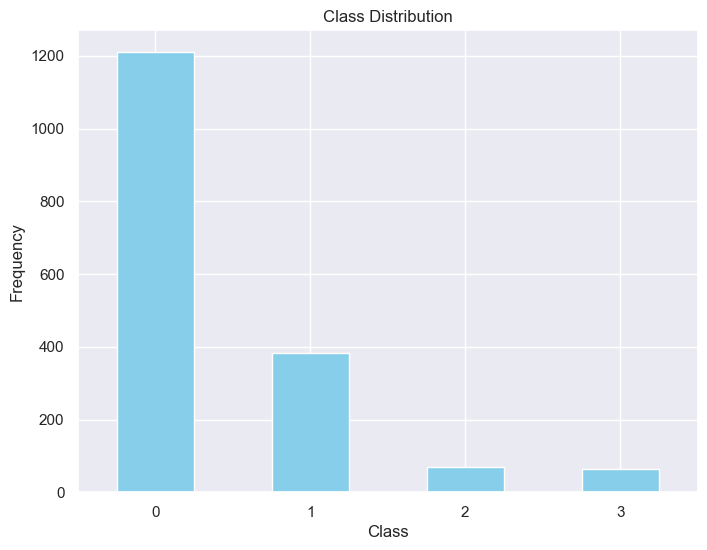

In [8]:
class_counts = data['class'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [9]:
class_frequencies = class_counts / len(data)
print("Class Frequencies:")
print(class_frequencies)

print("Class Ratios:")
print(class_counts / class_counts.sum())

print("Summary Statistics:")
print(class_counts.describe())

Class Frequencies:
0    0.700231
1    0.222222
2    0.039931
3    0.037616
Name: class, dtype: float64
Class Ratios:
0    0.700231
1    0.222222
2    0.039931
3    0.037616
Name: class, dtype: float64
Summary Statistics:
count       4.000000
mean      432.000000
std       539.767234
min        65.000000
25%        68.000000
50%       226.500000
75%       590.500000
max      1210.000000
Name: class, dtype: float64


## Data Balancing

In [10]:
from collections import Counter

class_column = 'class'

class_frequencies = data[class_column].value_counts(normalize=True)


majority_class = class_frequencies.idxmax()

desired_samples = {cls: int(class_frequencies[majority_class] * len(data)) for cls in class_frequencies.index}


balanced_data = pd.DataFrame()
for cls, count in desired_samples.items():
    samples = data[data[class_column] == cls].sample(count, replace=True, random_state=42)
    balanced_data = pd.concat([balanced_data, samples], ignore_index=True)


balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

X_balanced = balanced_data.drop(columns=[class_column])
y_balanced = balanced_data[class_column]

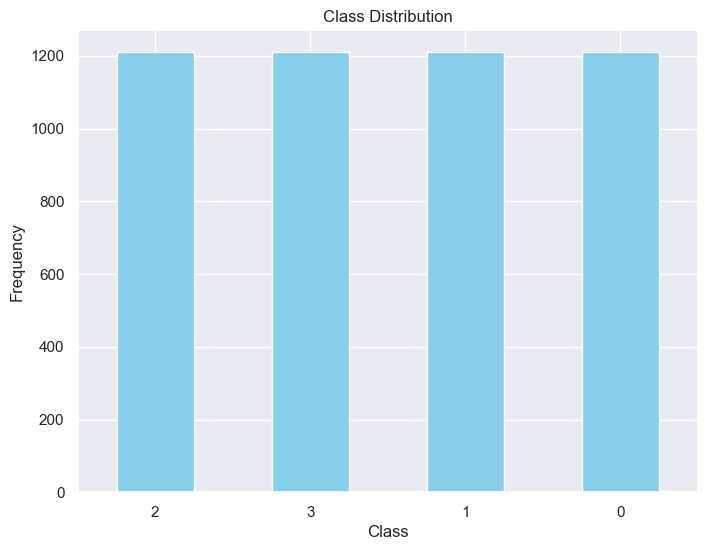

In [11]:
class_counts = balanced_data['class'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [12]:
class_frequencies_before = data['class'].value_counts(normalize=True)
print("Class Frequencies Before Balancing:")
print(class_frequencies_before)

class_frequencies_after = y_balanced.value_counts(normalize=True)
print("\nClass Frequencies After Balancing:")
print(class_frequencies_after)

Class Frequencies Before Balancing:
0    0.700231
1    0.222222
2    0.039931
3    0.037616
Name: class, dtype: float64

Class Frequencies After Balancing:
2    0.25
3    0.25
1    0.25
0    0.25
Name: class, dtype: float64


In [13]:
data = balanced_data 

## One-Hot Encoding

In [14]:
data = pd.get_dummies(data, drop_first = True)

In [15]:
data

,class,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,2,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0
1,2,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
2,3,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
4,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835,3,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0
4836,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4837,2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4838,3,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0


## Applying Classification before Mining

In [16]:
X=data.drop('class', axis=1)
y=data['class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Function for model evaluation based on metrics

In [18]:
def evaluate(model, X_test, y_test):
    
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)
    
    roc_score_test = roc_auc_score(y_test, y_prob_test, multi_class='ovr')
    gini_score_test = roc_score_test*2-1
    
    y_pred_train = model.predict(X_train)
    y_prob_train = model.predict_proba(X_train)
    
    roc_score_train = roc_auc_score(y_train, y_prob_train, multi_class='ovr' )
    gini_score_train = roc_score_train*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
    
    accuracy_score_test = metrics.accuracy_score(y_test, y_pred_test)
    accuracy_score_train = metrics.accuracy_score(y_train, y_pred_train)
    
    print('Model Performance:')

    print('Gini Score for Test:', gini_score_test*100)
    
    print('Gini Score for Train:', gini_score_train*100)
    
    print('Accuracy Score for Test:', accuracy_score_test*100)
    
    print('Accuracy Score for Train:', accuracy_score_train*100)
    
    print('Confusion Matrix:', confusion_matrix)

In [19]:
rfc = RandomForestClassifier()

In [20]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
result_rfc = evaluate(rfc, X_test, y_test)

Model Performance:
Gini Score for Test: 99.98055889159889
Gini Score for Train: 100.0
Accuracy Score for Test: 99.69008264462809
Accuracy Score for Train: 100.0
Confusion Matrix: [[230   3   0   0]
 [  0 240   0   0]
 [  0   0 251   0]
 [  0   0   0 244]]


## Univariate Analysis

In [22]:
variables= []
train_Gini=[]
test_Gini=[]

for i in X_train.columns:
    X_train_single=X_train[[i]]
    X_test_single=X_test[[i]]
    
    rfc.fit(X_train_single, y_train)
    y_prob_train_single=rfc.predict_proba(X_train_single)
    
    
    roc_prob_train=roc_auc_score(y_train, y_prob_train_single, multi_class='ovr')
    gini_prob_train=2*roc_prob_train-1
    
    
    rfc.fit(X_test_single, y_test)
    y_prob_test_single=rfc.predict_proba(X_test_single)
    
    
    roc_prob_test=roc_auc_score(y_test, y_prob_test_single, multi_class='ovr')
    gini_prob_test=2*roc_prob_test-1
    
    
    variables.append(i)
    train_Gini.append(gini_prob_train)
    test_Gini.append(gini_prob_test)
    

df = pd.DataFrame({'Variable': variables, 'Train Gini': train_Gini, 'Test Gini': test_Gini})

df= df.sort_values(by='Test Gini', ascending=False)

df   

,Variable,Train Gini,Test Gini
0,buying_low,0.263963,0.280101
14,safety_med,0.252122,0.248456
3,maint_low,0.211459,0.226378
13,safety_low,0.237414,0.221586
12,lug_boot_small,0.160754,0.164799
2,buying_vhigh,0.154688,0.162389
5,maint_vhigh,0.162527,0.161022
9,persons_4,0.122885,0.132731
10,persons_more,0.130973,0.107849
4,maint_med,0.067015,0.072165


## Pattern Mining 

## Creating Transactions for the Mining Algorithms

In [23]:
 transactions = []
for index, row in data.iterrows():
    transaction = [str(row['class'])]
    for column in data.columns[1:]: 
        if row[column] == 1:
            transaction.append(column)
    transactions.append(transaction)

In [24]:
with open('input.txt', 'w') as f:
    for transaction in transactions:
        f.write(' '.join(transaction) + '\n')

## Apriori Algorithm

In [25]:
from mlxtend.frequent_patterns import apriori, association_rules

start_time = time.time()
apriori_algorithm = apriori(data.iloc[:, 1:], min_support=0.0001, use_colnames=True)

apriori_runtime = time.time() - start_time

num_patterns_apriori = len(apriori_algorithm)


rules_apriori = association_rules(apriori_algorithm, metric="lift", min_threshold=1)
rules_apriori = rules_apriori.sort_values(['confidence', 'lift'], ascending=[False, False])

C:\Users\ASUS\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [26]:
apriori_algorithm

,support,itemsets
0,0.427273,(buying_low)
1,0.322727,(buying_med)
2,0.117149,(buying_vhigh)
3,0.385124,(maint_low)
4,0.307025,(maint_med)
...,...,...
1646,0.000620,"(lug_boot_med, safety_med, maint_vhigh, buying..."
1647,0.000207,"(maint_vhigh, safety_low, lug_boot_small, buyi..."
1648,0.000207,"(safety_med, maint_vhigh, lug_boot_small, buyi..."
1649,0.000207,"(lug_boot_med, maint_vhigh, safety_low, person..."


In [27]:
rules_apriori.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16493,"(lug_boot_med, maint_vhigh, doors_4, safety_lo...",(buying_vhigh),0.000207,0.117149,0.000207,1.0,8.536155,0.000182,inf,0.883034
13117,"(doors_5more, lug_boot_med, persons_more, buyi...",(maint_vhigh),0.000207,0.121694,0.000207,1.0,8.217317,0.000181,inf,0.878487
16888,"(safety_med, lug_boot_small, buying_vhigh, doo...",(maint_vhigh),0.000207,0.121694,0.000207,1.0,8.217317,0.000181,inf,0.878487
16938,"(doors_5more, lug_boot_med, persons_more, buyi...",(maint_vhigh),0.000207,0.121694,0.000207,1.0,8.217317,0.000181,inf,0.878487
12143,"(maint_med, doors_3, buying_low, safety_low, p...",(lug_boot_small),0.000207,0.242355,0.000207,1.0,4.126172,0.000157,inf,0.757801


In [28]:
print("Apriori Runtime:", apriori_runtime, 'seconds')

print("Number of patterns generated by Apriori:", num_patterns_apriori)

Apriori Runtime: 0.2577681541442871 seconds
Number of patterns generated by Apriori: 1651


## Eclat Algorithm

In [29]:
eclat_rules = association_rules(apriori_algorithm, metric="support", support_only=True,min_threshold=0.1)
eclat_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(buying_low),(maint_low),NaN,NaN,0.155785,NaN,NaN,NaN,NaN,NaN
1,(maint_low),(buying_low),NaN,NaN,0.155785,NaN,NaN,NaN,NaN,NaN
2,(maint_med),(buying_low),NaN,NaN,0.148554,NaN,NaN,NaN,NaN,NaN
3,(buying_low),(maint_med),NaN,NaN,0.148554,NaN,NaN,NaN,NaN,NaN
4,(buying_low),(doors_3),NaN,NaN,0.100620,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
67,(lug_boot_med),(persons_more),NaN,NaN,0.160537,NaN,NaN,NaN,NaN,NaN
68,(persons_more),(safety_med),NaN,NaN,0.150620,NaN,NaN,NaN,NaN,NaN
69,(safety_med),(persons_more),NaN,NaN,0.150620,NaN,NaN,NaN,NaN,NaN
70,(lug_boot_med),(safety_med),NaN,NaN,0.123140,NaN,NaN,NaN,NaN,NaN


In [30]:
eclat_rules = eclat_rules[['antecedents','consequents','support']]
eclat_rules

,antecedents,consequents,support
0,(buying_low),(maint_low),0.155785
1,(maint_low),(buying_low),0.155785
2,(maint_med),(buying_low),0.148554
3,(buying_low),(maint_med),0.148554
4,(buying_low),(doors_3),0.100620
...,...,...,...
67,(lug_boot_med),(persons_more),0.160537
68,(persons_more),(safety_med),0.150620
69,(safety_med),(persons_more),0.150620
70,(lug_boot_med),(safety_med),0.123140


## FP-Growth Algorithm

In [31]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

start_time = time.time()
fp_growth_algorithm = fpgrowth(data.iloc[:, 1:], min_support=0.0001, use_colnames=True)

fp_growth_runtime = time.time() - start_time

num_patterns_fp_growth = len(fp_growth_algorithm)

rules_fp_growth = association_rules(fp_growth_algorithm, metric="lift", min_threshold=1)
rules_fp_growth = rules_fp_growth.sort_values(['confidence', 'lift'], ascending=[False, False])

C:\Users\ASUS\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [32]:
fp_growth_algorithm

,support,itemsets
0,0.427686,(persons_more)
1,0.427273,(buying_low)
2,0.385124,(maint_low)
3,0.350413,(lug_boot_med)
4,0.330579,(safety_med)
...,...,...
1646,0.000207,"(maint_med, doors_3, persons_more, buying_low,..."
1647,0.000413,"(maint_vhigh, doors_3, persons_more, buying_lo..."
1648,0.000207,"(maint_med, doors_3, lug_boot_small, persons_m..."
1649,0.011364,"(lug_boot_med, safety_low, persons_4)"


In [33]:
rules_fp_growth.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9565,"(lug_boot_med, maint_vhigh, doors_4, safety_lo...",(buying_vhigh),0.000207,0.117149,0.000207,1.0,8.536155,0.000182,inf,0.883034
8002,"(doors_5more, lug_boot_med, persons_more, buyi...",(maint_vhigh),0.000207,0.121694,0.000207,1.0,8.217317,0.000181,inf,0.878487
8252,"(safety_med, lug_boot_small, buying_vhigh, doo...",(maint_vhigh),0.000207,0.121694,0.000207,1.0,8.217317,0.000181,inf,0.878487
15639,"(doors_5more, lug_boot_med, persons_more, buyi...",(maint_vhigh),0.000207,0.121694,0.000207,1.0,8.217317,0.000181,inf,0.878487
6130,"(maint_med, doors_4, buying_vhigh, safety_low,...",(lug_boot_small),0.000207,0.242355,0.000207,1.0,4.126172,0.000157,inf,0.757801


In [34]:
print("FP-Growth Runtime:", fp_growth_runtime, 'seconds')

print("Number of patterns generated by FP-Growth:", num_patterns_fp_growth)

FP-Growth Runtime: 0.18481898307800293 seconds
Number of patterns generated by FP-Growth: 1651


## PrefixSpan Algorithm

In [35]:
sequences = data.iloc[:, 1:].apply(lambda row: row.dropna().tolist(), axis=1).tolist()

In [36]:
from prefixspan import PrefixSpan
from mlxtend.frequent_patterns import association_rules

start_time = time.time()

sequences = data.iloc[:, 1:].apply(lambda row: row.dropna().tolist(), axis=1).tolist()

prefixspan_algorithm = PrefixSpan(sequences).frequent(0.01)

num_patterns_prefixspan = len(prefixspan_algorithm)

patterns = [([item], support) for item, support in prefixspan_algorithm]

patterns_df = pd.DataFrame(patterns, columns=['itemsets', 'support'])

patterns_df['itemsets'] = patterns_df['itemsets'].apply(lambda x: frozenset(x))

execution_time = time.time() - start_time

In [37]:
patterns_df

,itemsets,support
0,(4839),[1]
1,(4836),"[1, 0]"
2,(4832),"[1, 0, 0]"
3,(4789),"[1, 0, 0, 1]"
4,(4752),"[1, 0, 0, 1, 0]"
...,...,...
10298,(154),"[0, 1, 1, 0, 1, 1, 1, 0, 0, 1]"
10299,(231),"[0, 1, 1, 0, 1, 1, 1, 0, 1]"
10300,(28),"[0, 1, 1, 0, 1, 1, 1, 0, 1, 0]"
10301,(260),"[0, 1, 1, 0, 1, 1, 1, 1]"


In [38]:
print("Execution time:", execution_time, "seconds")
print("Number of patterns generated by PrefixSpan:", num_patterns_prefixspan)

Execution time: 11.110143184661865 seconds
Number of patterns generated by PrefixSpan: 10303


## Classification After Mining

In [39]:
unique_items = set()
for idx, itemset in apriori_algorithm.iterrows():
    unique_items.update(set(itemset['itemsets']))

unique_items = list(unique_items)

df = pd.DataFrame(columns=unique_items)

for idx, itemset in apriori_algorithm.iterrows():
    transaction = {}
    for item in unique_items:
        if item in itemset['itemsets']:
            transaction[item] = 1
        else:
            transaction[item] = 0
    df = df.append(transaction, ignore_index=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2071541556.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(transaction, ignore_index=True)
C:\U

In [40]:
df

,maint_med,lug_boot_small,safety_low,buying_med,lug_boot_med,safety_med,maint_vhigh,doors_3,buying_low,maint_low,doors_4,persons_more,buying_vhigh,doors_5more,persons_4
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1
1647,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1
1648,0,1,0,0,0,1,1,0,0,0,0,0,1,1,1
1649,0,0,1,0,1,0,1,0,0,0,0,1,1,1,0


In [41]:
df['class'] = data['class']

In [42]:
df

,maint_med,lug_boot_small,safety_low,buying_med,lug_boot_med,safety_med,maint_vhigh,doors_3,buying_low,maint_low,doors_4,persons_more,buying_vhigh,doors_5more,persons_4,class
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1
1647,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,2
1648,0,1,0,0,0,1,1,0,0,0,0,0,1,1,1,3
1649,0,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1


In [43]:
X=df.drop('class', axis=1)
y=df['class']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
def evaluate(model, X_test, y_test):
    
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)
    
    roc_score_test = roc_auc_score(y_test, y_prob_test, multi_class='ovr')
    gini_score_test = roc_score_test*2-1
    
    y_pred_train = model.predict(X_train)
    y_prob_train = model.predict_proba(X_train)
    
    roc_score_train = roc_auc_score(y_train, y_prob_train, multi_class='ovr' )
    gini_score_train = roc_score_train*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
    
    accuracy_score_test = metrics.accuracy_score(y_test, y_pred_test)
    accuracy_score_train = metrics.accuracy_score(y_train, y_pred_train)
    
    print('Model Performance:')

    print('Gini Score for Test:', gini_score_test*100)
    
    print('Gini Score for Train:', gini_score_train*100)
    
    print('Accuracy Score for Test:', accuracy_score_test*100)
    
    print('Accuracy Score for Train:', accuracy_score_train*100)
    
    print('Confusion Matrix:', confusion_matrix)

In [46]:
rfc = RandomForestClassifier()

In [47]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
result_rfc = evaluate(rfc, X_test, y_test)

Model Performance:
Gini Score for Test: -0.9934094538898375
Gini Score for Train: 100.0
Accuracy Score for Test: 23.26283987915408
Accuracy Score for Train: 100.0
Confusion Matrix: [[26 25 13 22]
 [16 25 19 24]
 [27 23 14 19]
 [26 24 16 12]]


In [49]:
from sklearn.feature_selection import SelectFromModel

In [50]:
sfm = SelectFromModel(rfc)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [51]:
selected_feature = X.columns[(sfm.get_support())]
selected_feature

Index(['lug_boot_small', 'safety_low', 'buying_med', 'lug_boot_med',
       'safety_med', 'persons_more', 'persons_4'],
      dtype='object')

In [52]:
feature_scores = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

persons_4         0.081615
persons_more      0.079099
lug_boot_small    0.075753
lug_boot_med      0.073620
safety_low        0.072177
buying_vhigh      0.067238
buying_med        0.066088
doors_3           0.064381
doors_5more       0.064172
buying_low        0.063413
doors_4           0.063108
safety_med        0.062804
maint_vhigh       0.057546
maint_med         0.056478
maint_low         0.052509
dtype: float64

In [53]:
X_train=X_train[['lug_boot_med', 'persons_4', 'lug_boot_small', 'buying_vhigh',
       'persons_more', 'buying_med']]
X_test=X_test[['lug_boot_med', 'persons_4', 'lug_boot_small', 'buying_vhigh',
       'persons_more', 'buying_med']]

In [54]:
rfc_importance = RandomForestClassifier()
rfc_importance.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
result_rfc_importance = evaluate(rfc_importance, X_test, y_test)

Model Performance:
Gini Score for Test: -1.426757219317154
Gini Score for Train: 16.85178309222699
Accuracy Score for Test: 25.6797583081571
Accuracy Score for Train: 32.121212121212125
Confusion Matrix: [[45 18 14  9]
 [39 15 13 17]
 [41 13 12 17]
 [43  9 13 13]]


## Applying Hyper-parameter Tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [57]:
rfc_randomized = RandomizedSearchCV(estimator = rfc_importance, param_distributions = random_grid, 
                                    n_iter = 10, 
                                    cv = 5, 
                                    verbose=1, 
                                    random_state=42, 
                                    n_jobs = -1)

rfc_randomized.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklea

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [58]:
result_rfc_randomized = evaluate(rfc_randomized, X_test, y_test)

Model Performance:
Gini Score for Test: -1.4542006100785043
Gini Score for Train: 16.909994077177505
Accuracy Score for Test: 25.6797583081571
Accuracy Score for Train: 32.121212121212125
Confusion Matrix: [[45 18 14  9]
 [39 15 13 17]
 [41 13 12 17]
 [43  9 13 13]]
